# CMSE 202: Semester Group Project

**Section:** 003

**Group Members:** 
* Himali Bhandar:Model 
* Amanda Bowerman: Model
* Blake Stewart: Speech processing- Monday 4/6 
* Jalin Lewis: Results 
* Matthew Sitto: Control variables dataframe (data collection)- Monday 4/6
* Riley Latham: Speech Processing  - Monday 4/6
* Alexis Morse: Results


## Statement of the Probelm - Everyone

As a group, we have decided to investigate US Presidential candidate speeches through US history and their possible correlation with approval rates. We want to do sentiment analysis on these candidate speeches (most probably Presidential debate speeches) and after making a thorough analysis of these speeches we want to compare the approval rates of the candidate before, on the day of, and after the debate to see the impact of the debate speech. 

We basically want to determine the winner of an election using the speech and also analyze why did a particular candidate win.

We might even include fundraising data of each candidate and see how that relates to the speech made by the candidate. 

NOTE: This problem statement is tentative, we might make some changes later on when we decide specifics of our model and our final data sources.

**STATEMENT OF THE PROBLEM: How much, quantitatively, do the presidential election debates affect the outcome of a presidential election?**

## Data - Riley, Blake and Matt

Some possible links we might use in our project are:
* Debates : https://www.debates.org/voter-education/debate-transcripts/
* Election outcomes: https://www.presidency.ucsb.edu/statistics/elections
* Some control variables: https://www.presidency.ucsb.edu/statistics/data
* Approval ratings (RealClearPolitics): https://www.realclearpolitics.com/epolls/2008/president/us/general_election_mccain_vs_obama-225.html
* Approval ratings (WikiWand): https://www.wikiwand.com/en/United_States_presidential_approval_rating#/Historical_comparison

## Model - Himali & Amanda

We are planning to use Sentiment Analysis on the speeches. Sentiment analysis is a common NLP (Natural Language  task, which involves classifying texts or parts of texts into a pre-defined sentiment.

As a prerequiste for the model, we still have yet to decide on one or more pre-defined sentiments that we are going to use in our model. 

Some Python methods that will be included in this model are: numpy, matplotlib, seaborn, pandas, sklearn.

This pre-defined sentiment and comparison with approval rates of the candidate will possibly part of our evaluation crtieria.

## Results - Alexis & Jalin

Our results will possibly be declaring one candidate from a debate a winner. 

And we might also include some regression analysis on how sentiments from different speeches have behaved throughtout the US Presidential elections. 

The results section is heavily dependent on what type of model we decide to do. Thats why, we haven't actually come up with anything concrete in this section yet.

## Conclusions - Everyone

Some issues we might run into are:

* Finding proper data without any inconsistencies for both the speeches and approval rates.
* Deciding on an appropriate pre-defined sentiment.
* Likely issues in the actual word processing. 



In [101]:
from Machine_Learning_KNN1 import predict
import matplotlib.pyplot as plt
import numpy as np

In [107]:
ypredict, accuracy_k, ytest = predict(3,0.4)

In [108]:
print(ypredict)

['W' 'W' 'L' 'W']


<BarContainer object of 3 artists>

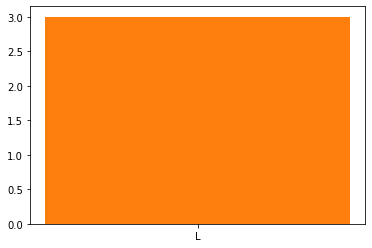

In [109]:
height1 = len(ypredict)
height2 = len(ytest)
wins_predict = []
loss_predict = []
win_count = 0
loss_count = 0
win_test = []
loss_test = []
win_count_test = 0
loss_count_test = 0

for i in ypredict:
    if i == "W":
        win_count+=1
        wins_predict.append(i)
    else:
        loss_count +=1
        loss_predict.append(i)
for j in ytest:
    if j == "W":
        win_count_test+=1
        win_test.append(j)
    else:
        loss_count_test+=1
        loss_test.append(j)

#plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
#plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)

In [110]:
print(ytest)

['L', 'L', 'W', 'L']


In [106]:
print(accuracy_k)

0.5


In [ ]:
accuracy_k = []
accuracy_ts = []
k = [1,2,3,4,5]
test_size = [0.1,0.2,0.4,0.5,0.7]
y_predict = []
plt.bar(wins_predict,win_count)
plt.bar(loss_predict, loss_count)
plt.bar(win_test,win_count_test)
plt.bar(loss_test,loss_count_test)